# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas auxiliares
import os
from functools import reduce
import re
import matplotlib.pyplot as plt
import folium

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

folium    : 0.12.1
pandas    : 1.2.2
re        : 2.2.1
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
numpy     : 1.20.1
matplotlib: 3.3.3



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## SEADE
fonte: https://www.seade.gov.br/coronavirus/

In [3]:
dados_covid_sp = pyarrow_read_csv(path_data+"SEADE/dados_covid_sp.csv",sep=";")

<b>Dicionario de dados</b><br>

| Variável | Descrição |
| --- | --- |
| nome_munic | Nome do município |
| codigo_ibge | Código do município no IBGE (7 dígitos) |
| dia | Dia |
| mes | Mês |
| datahora | Data no formato YYYY-MM-DD |
| casos | Casos totais registrados até a data|
| casos_novos | Casos novos registrados na data |
| casos_pc | Casos totais por 100 mil habitantes |
| casos_mm7d  | Média móvel dos últimos 7 dias dos novos casos|
| obitos|Óbitos totais registrados até a data|
| obitos_novos|Óbitos novos registrados na data|
| obitos_pc|Óbitos totais por 100 mil habitantes|
| obitos_mm7d|Média móvel dos últimos 7 dias dos novos óbitos|
| letalidade|casos / obitos|
| nome_ra|Nome da Região Administrativa|
| cod_ra|Código da Região Administrativa|
| nome_drs|Nome do Dpto. Regional de Saúde|
| cod_drs|Código do Dpto. Regional de Saúde|
| pop|População Estimada (fonte: SEADE)|
| pop60|População acima de 60 anos (fonte: SEADE)|
| area|Área do município em Km2|
| map_leg|Rótulo da legenda para mapa|
| map_leg_s|Código da legenda para mapa|
| latitude|Latitude|
| longitude|Longitude|
| semana_epidem|Semana Epidemológica|

fonte: https://github.com/seade-R/dados-covid-sp

___

# Analisando as bases de dados

In [4]:
describe(dados_covid_sp)

Quantidade de linhas: 276488


variable     type   na na_pct  unique      min     quat25     median  \
0      nome_munic   object    0   0.0%     646        -          -          -   
1     codigo_ibge    int64    0   0.0%     646  3500105  3514601.0  3528754.5   
2             dia    int64    0   0.0%      31        1        8.0       16.0   
3             mes    int64    0   0.0%      12        1        3.0        5.5   
4        datahora   object    0   0.0%     428        -          -          -   
5           casos    int64    0   0.0%   14356       -1        9.0      119.0   
6     casos_novos    int64    0   0.0%     911     -419        0.0        0.0   
7        casos_pc   object    0   0.0%  121280        -          -          -   
8      casos_mm7d   object    0   0.0%    2456        -          -          -   
9          obitos    int64    0   0.0%    2031        0        0.0        3.0   
10   obitos_novos    int64    0   0.0%     168      -41        0.0        0.0   
11      obitos_pc   object    0   0.0%   26201        -          -          -   
12    obitos_mm7d   object    0   0.0%     488        -          -          -   
13     letalidade   object    0   0.0%   45314        -          -          -   
14        nome_ra   object    0   0.0%      17        -          -          -   
15         cod_ra    int64    0   0.0%      17        0        4.0        8.0   
16       nome_drs   object    0   0.0%      18        -          -          -   
17        cod_drs    int64    0   0.0%      18        0        5.0        9.0   
18            pop    int64    0   0.0%     643        0     5530.0    13283.0   
19         pop_60    int64    0   0.0%     604        0      926.0     2193.0   
20           area    int64    0   0.0%     645        0    13391.0    24806.5   
21        map_leg   object    0   0.0%       9        -          -          -   
22      map_leg_s  float64  428  0.15%       8      1.0        4.0        6.0   
23       latitude   object    0   0.0%     641        -          -          -   
24      longitude   object    0   0.0%     640        -          -          -   
25  semana_epidem    int64    0   0.0%      53        1       12.0       23.0   

              mean     quat75       max            std skewness kurtosis  \
0                -          -         -              -        -        -   
1   3538715.374613  3543238.0   9999999   254959.09966    25.19   635.52   
2        15.764019       23.0        31       8.792425     -0.0     -1.2   
3         6.058411        9.0        12       3.385496     0.27    -1.18   
4                -          -         -              -        -        -   
5      1535.709499      586.0    708635   14039.312763    32.21  1209.89   
6        10.330376        3.0      8646      90.703262    38.62  2055.68   
7                -          -         -              -        -        -   
8                -          -         -              -        -        -   
9        51.158188       14.0     26915     540.752213    30.63  1069.13   
10        0.339407        0.0       378       3.751382    43.02  2652.85   
11               -          -         -              -        -        -   
12               -          -         -              -        -        -   
13               -          -         -              -        -        -   
14               -          -         -              -        -        -   
15        8.470588       13.0        16       4.571582    -0.02    -1.31   
16               -          -         -              -        -        -   
17        9.140867       14.0        17       4.985465     -0.0    -1.34   
18    69102.010836    41073.0  11869660  479451.766708    23.16   565.24   
19    10575.390093     6377.0   1853286   74654.243705    23.35   571.75   
20    34178.256966    45444.0    182626   31348.591727     1.74     3.37   
21               -          -         -              -        -        -   
22        5.264848        7.0       8.0       2.158976    -0.45    -1.01 

In [5]:
dados_covid_sp.head()

nome_munic  codigo_ibge  dia  mes    datahora  casos  casos_novos  \
0        Adamantina      3500105   25    2  2020-02-25      0            0   
1            Adolfo      3500204   25    2  2020-02-25      0            0   
2             Aguaí      3500303   25    2  2020-02-25      0            0   
3    Águas da Prata      3500402   25    2  2020-02-25      0            0   
4  Águas de Lindóia      3500501   25    2  2020-02-25      0            0   

       casos_pc    casos_mm7d  obitos  ...               nome_drs cod_drs  \
0  0,000000e+00     0,0000000       0  ...                Marília       5   
1  0,000000e+00     0,0000000       0  ...  São José do Rio Preto      15   
2  0,000000e+00     0,0000000       0  ...  São João da Boa Vista      14   
3  0,000000e+00     0,0000000       0  ...  São João da Boa Vista      14   
4  0,000000e+00     0,0000000       0  ...               Campinas       3   

     pop pop_60   area  map_leg map_leg_s  latitude  longitude  semana_epidem  
0  33894   7398  41199        0       8.0  -21,6820   -51,0737              9  
1   3447    761  21106        0       8.0  -21,2325   -49,6451              9  
2  35608   5245  47455        0       8.0  -22,0572   -46,9735              9  
3   7797   1729  14267        0       8.0  -21,9319   -46,7176              9  
4  18374   3275   6013        0       8.0  -22,4733   -46,6314              9  

[5 rows x 26 columns]

In [6]:
dados = dados_covid_sp.copy()

## nome_munic

In [7]:
#Mais uma vez, temos 646 municipios e não 645, conforme constam os dados oficiais
cidades_sp = ['São Paulo', 'Campinas', 'São José do Rio Preto', 'São José dos Campos', 'São Bernardo do Campo', 'Ribeirão Preto', 'Guarulhos',
 'Santo André', 'Santos','Sorocaba', 'Piracicaba', 'Jundiaí', 'Bauru', 'Osasco', 'Carapicuíba', 'Barueri', 'Mogi das Cruzes', 'Araçatuba',
 'Franca', 'Mauá', 'Diadema', 'Presidente Prudente', 'Taubaté', 'Marília', 'Sumaré', 'Indaiatuba', 'São Carlos', 'Jacareí', 'Suzano', 'Guarujá',
 'Hortolândia', 'Araraquara', 'Americana', 'Limeira', 'Praia Grande', 'Taboão da Serra', "Santa Bárbara d'Oeste", 'São Caetano do Sul',
 'São Vicente', 'Araras', 'Itu', 'Caraguatatuba', 'Itaquaquecetuba', 'Bragança Paulista', 'Mogi Guaçu', 'Paulínia', 'Sertãozinho', 'Itapetininga',
 'Votuporanga', 'Cubatão', 'Botucatu', 'Birigui', 'Barretos', 'Santana de Parnaíba', 'Cotia', 'Valinhos', 'Lençóis Paulista', 'Rio Claro',
 'Franco da Rocha', 'Ourinhos', 'Pindamonhangaba', 'Atibaia', 'Francisco Morato', 'Itapevi', 'Catanduva', 'Embu das Artes', 'Mogi Mirim',
 'Fernandópolis', 'Ferraz de Vasconcelos', 'Leme', 'Salto', 'Itatiba', 'Jaú', 'Lins', 'Assis', 'Olímpia', 'Ribeirão Pires', 'Pirassununga',
 'Caieiras', 'Vinhedo', 'Mirassol', 'São Sebastião', 'Votorantim', 'Avaré', 'Arujá', 'Itapecerica da Serra', 'Poá', 'Guaratinguetá',
 'São João da Boa Vista', 'Caçapava', 'Ilhabela', 'Ibitinga', 'Cosmópolis', 'Porto Feliz', 'Ubatuba', 'Tatuí', 'Jandira', 'Itapira', 'Mairiporã',
 'Itapeva', 'Peruíbe', 'Várzea Paulista', 'Registro', 'Santa Isabel', 'Jales', 'Jaboticabal', 'Penápolis', 'Bertioga', 'Andradina', 'São Roque',
 'Nova Odessa', 'Mococa', 'Itupeva', 'Dracena', 'Itanhaém', 'Promissão', 'Boituva', 'Pontal', 'Amparo', 'Cruzeiro', 'Monte Mor', 
 'Campo Limpo Paulista', 'Itararé', 'Serrana', 'Embu-Guaçu', 'José Bonifácio', 'São Joaquim da Barra', 'Guaíra', 'Lorena', 'Cerquilho',
 'Jaguariúna', 'Espírito Santo do Pinhal', 'Taquaritinga', 'Campos do Jordão', 'Cajamar', 'Cordeirópolis', 'Capivari', 'Monte Alto', 'Pitangueiras',
 'Tupã', 'Porto Ferreira', 'Novo Horizonte', 'Bebedouro', 'Piedade', 'Iracemápolis', 'Morro Agudo', 'Artur Nogueira', 'Matão', 'São Pedro',
 'Capão Bonito', 'Tanabi', 'Itápolis', 'Américo Brasiliense', 'Orlândia', 'Cabreúva', 'São Manuel', 'Guariba', 'Santa Cruz do Rio Pardo', 'Pederneiras',
 'Cajati', 'Louveira', 'Mairinque', 'Santa Fé do Sul', 'Laranjal Paulista', 'Guareí', 'Santa Cruz das Palmeiras', 'Ibaté', 'Agudos', 'Pedreira',
 'Barra Bonita', 'Ibiúna', 'Jardinópolis', 'Descalvado', 'Garça', 'Macatuba', 'Santa Gertrudes', 'Salto de Pirapora', 'Guararapes', 'Adamantina',
 'Piracaia', 'Paraguaçu Paulista', 'Cândido Mota', 'Socorro', 'Rancharia', 'Bady Bassitt', 'Bariri', 'Tietê', 'Angatuba', 'Nova Granada', 'Batatais',
 'Buri', 'Aparecida', 'Taquarituba', 'Rio das Pedras', 'Araçoiaba da Serra', 'Vargem Grande do Sul', 'Engenheiro Coelho', 'Presidente Venceslau',
 'Santo Antônio de Posse', 'Osvaldo Cruz', 'Aguaí', 'Presidente Epitácio', 'Cachoeira Paulista', 'Potirendaba', 'Tambaú', 'Buritama', 'Ilha Solteira',
 'Severínia', 'Iperó', 'Pariquera-Açu', 'Igaratá', 'Tremembé', 'Brodowski', 'Jarinu', 'Monte Aprazível', 'Pirapozinho', 'Rio Grande da Serra',
 'Serra Negra', 'Vargem Grande Paulista', 'Pilar do Sul', 'Guapiara', 'Valparaíso', 'Bom Jesus dos Perdões', 'Palmital', 'Juquitiba', 'Casa Branca',
 'Auriflama', 'Pirajuí', 'Guapiaçu', 'Iguape', 'Mirandópolis', 'Castilho', 'Santa Rosa de Viterbo', 'Conchas', 'São José do Rio Pardo', 'Conchal',
 'Itaberá', 'Itaí', 'Valentim Gentil', 'Miracatu', 'Tabatinga', 'Viradouro', 'Guará', 'Holambra', 'Potim', 'Igaraçu do Tietê', 'Teodoro Sampaio',
 'Álvares Machado', 'Pereira Barreto', 'Mongaguá', 'Pirapora do Bom Jesus', 'Sales Oliveira', 'Pradópolis', 'Tupi Paulista', 'Ipuã', 'Juquiá',
 'Itatinga', 'Guararema', 'Bálsamo', 'Cravinhos', 'Dois Córregos', 'Monte Azul Paulista', 'Ituverava', 'Junqueirópolis', 'Barrinha', 'Pirangi',
 'Itajobi', 'Taguaí', 'Cerqueira César', 'Piraju', 'Araçariguama', 'Luís Antônio', 'Sete Barras', 'Itirapina', 'Cesário Lange', 'Ipaussu',
 'Ribeirão Branco', 'Alumínio', 'Igarapava', 'Santo Anastácio', 'Nazaré Paulista', 'Bocaina', 'Itaporanga', 'Santa Rita do Passa Quatro', 'Guaiçara',
 'Jacupiranga', 'São Miguel Arcanjo', 'Capela do Alto', 'Itapuí', 'Eldorado', 'Ibirá', 'Maracaí', 'Águas de Lindóia', 'Paranapanema','Fartura',
 'Colina', 'Serra Azul', 'Charqueada', 'Riolândia', 'Elias Fausto', 'Santa Adélia', 'Biritiba Mirim', 'Roseira', 'Dumont', "Estrela d'Oeste",
 'Itariri', 'Martinópolis', 'Tarumã', 'Mineiros do Tietê', 'Palmares Paulista', 'Uchoa', 'Pacaembu', 'Caconde', 'Apiaí', 'Lucélia', 'Borborema',
 'Tabapuã', 'Urânia', 'Paraibuna', 'Rosana', 'Tapiratiba', 'Orindiúva', 'Flórida Paulista', 'Divinolândia', 'Neves Paulista', 'Pindorama', 'Ouroeste',
 'Miguelópolis', 'Gavião Peixoto', 'Areiópolis', 'Ilha Comprida', 'Iacanga', 'Quatá', 'Nhandeara', 'General Salgado', 'Presidente Bernardes',
 'Panorama', 'Torrinha', 'Joanópolis', 'Queluz', 'Boracéia', 'Getulina', 'Ipiguá', 'Cedral', 'Bananal', 'Cardoso', 'Bilac', 'Parapuã', 'Sud Mennucci',
 'Altinópolis', 'Boa Esperança do Sul', 'Icém', 'Cajuru', 'Guaraci', 'Cajobi', 'Taiúva', 'Santa Branca', 'Lavínia', 'São Sebastião da Grama',
 'Pereiras', 'Morungaba', 'Cafelândia', 'São Simão', 'Vista Alegre do Alto', 'Américo de Campos', 'Cristais Paulista', 'Nova Aliança', 'Mendonça',
 'Ribeirão Bonito', 'Clementina', 'Onda Verde', 'Jaci', 'Cunha', 'Piratininga', 'Urupês', 'Patrocínio Paulista', 'Rafard', 'Herculândia',
 'Nova Europa', 'Guaraçaí', "Aparecida d'Oeste", 'Terra Roxa', 'Pompéia', 'Arealva', 'Duartina', 'Ubarana', 'São Lourenço da Serra', 'Bofete',
 'Narandiba', 'Cananéia', 'Cosmorama', 'Catiguá', 'Estiva Gerbi', 'Avanhandava', 'Santa Albertina', 'Ibirarema', 'Piacatu', 'Iepê', 'Chavantes',
 'Mirante do Paranapanema', 'Pinhalzinho', "Palmeira d'Oeste", 'Bastos', 'Fernando Prestes', 'Itobi', 'Santa Lúcia', 'Manduri', 'Porangaba',
 'Saltinho', 'Irapuru', 'Salto Grande', 'Tarabai', 'Pratânia', 'Lindóia', 'Regente Feijó', 'Três Fronteiras', 'São Pedro do Turvo', 'Coroados',
 'Paulo de Faria', 'Santo Antônio do Aracanguá', 'Santa Cruz da Conceição', 'Barra do Turvo', 'Nova Campina', 'Irapuã', 'Palestina', 'Itapirapuã Paulista',
 'São Bento do Sapucaí', 'Brotas', 'Monte Castelo', 'Alambari', 'Salesópolis', 'João Ramalho', 'Vera Cruz', 'Planalto', 'Dourado', 'Pardinho',
 'Canitar', 'Guzolândia', 'Águas da Prata', 'Dobrada', 'Jaborandi', 'Santo Antônio do Pinhal', 'Ipeúna', 'Santo Antônio da Alegria', 'Bernardino de Campos',
 'Ribeirão do Sul', 'Macaubal', 'Poloni', 'Ariranha', 'Adolfo', 'Campina do Monte Alegre', 'Santópolis do Aguapeí', 'Santa Maria da Serra',
 'Itaju', 'Santo Antônio do Jardim', 'Monte Alegre do Sul', 'Ouro Verde', 'Braúna', 'Santa Ernestina', 'Echaporã', 'Guaimbê', 'Taciba',
 'Barbosa', 'Mirassolândia', 'Nipoã', 'Tapiraí', 'Álvares Florence', 'Gália', 'Elisiário', 'Corumbataí', 'Nova Independência', 'Paranapuã',
 'Balbinos', 'Rincão', 'Sarapuí', 'Parisi', 'Paulicéia', 'Quintana', 'Colômbia', 'Paraíso', 'Rifaina', 'Águas de Santa Bárbara', 'Riversul',
 'Coronel Macedo', 'Mira Estrela', 'Piquete', 'Silveiras', 'Suzanápolis', 'Jambeiro', 'Taiaçu', 'Glicério', 'Restinga', 'Ribeirão Grande',
 'Sales', 'Marapoama', 'Nuporanga', 'Brejo Alegre', 'Jumirim', 'Rubinéia', 'Guatapará', 'Reginópolis', 'Meridiano', 'Euclides da Cunha Paulista',
 'Avaí', 'Pedro de Toledo', 'Macedônia', 'Pontes Gestal', 'Arandu', 'Sabino', 'Motuca', 'Salmourão', 'Analândia', 'Pedregulho', 'Ocauçu',
 'Ribeira', 'Rinópolis', 'Inúbia Paulista', 'Caiuá', 'Bento de Abreu', 'Murutinga do Sul', 'Nova Luzitânia', 'Aramina', 'Taquaral', 'Areias',
 'Itaoca', 'Estrela do Norte', 'Novais', 'Guarantã', 'Zacarias', 'Iporanga', 'Cabrália Paulista', 'Alto Alegre', 'Barra do Chapéu', 'Ubirajara',
 'Oscar Bressane', 'Presidente Alves', 'Itirapuã', 'Taquarivaí', 'Águas de São Pedro', 'Lourdes', 'Emilianópolis', 'Lavrinhas', 'Buritizal',
 'Pedrinhas Paulista', 'Mombuca', 'Oriente', 'Espírito Santo do Turvo', 'Alfredo Marcondes', 'Indiana', 'Jeriquara', 'São José do Barreiro',
 'Campos Novos Paulista', 'Iacri', 'Pongaí', 'Anhumas', 'Arapeí', 'Platina', 'Sandovalina', 'Pedranópolis', 'Luiziânia', 'São Francisco',
 'Itapura', 'Barão de Antonina', 'São José da Bela Vista', 'Lupércio', "Santa Rita d'Oeste", 'Monções', 'Pracinha', 'Iaras', 'Pedra Bela',
 'Vitória Brasil', 'Nova Guataporanga', 'Ribeirão Corrente', 'Lutécia', 'Santa Salete', 'Monteiro Lobato', 'Queiroz', 'Nova Canaã Paulista',
 'Cássia dos Coqueiros', 'Piquerobi', 'Canas', 'Marinópolis', 'Mariápolis', 'Magda', 'Vargem', 'Indiaporã', 'Santo Expedito', 'Dolcinópolis',
 "Santa Clara d'Oeste", 'São João das Duas Pontes', 'Álvaro de Carvalho', 'Lagoinha', 'Pontalinda', 'Gastão Vidigal', 'Nantes', 'Turiúba',
 'Altair', 'Fernão', 'Floreal', 'Turmalina','Tuiuti', 'Anhembi', 'Populina', 'Florínea', 'Santa Cruz da Esperança', 'Uru', 'Borebi', 'Tejupá',
 'Gabriel Monteiro', 'Bom Sucesso de Itararé', 'Quadra', 'Santa Mercedes', 'Mesópolis', 'União Paulista', "Guarani d'Oeste", 'Alvinlândia',
 'Sebastianópolis do Sul', 'Flora Rica', 'Cruzália', 'Cândido Rodrigues', 'Sagres', "São João do Pau d'Alho", 'Natividade da Serra', 'Sarutaiá',
 'Lucianópolis', 'Júlio Mesquita', 'Dirce Reis', 'Timburi', 'Aspásia', 'Arco-Íris', 'São João de Iracema', 'Marabá Paulista', 'Embaúba',
 'Rubiácea', 'Redenção da Serra', 'Paulistânia', 'Caiabu', 'Torre de Pedra', 'Trabiju', 'Ribeirão dos Índios', 'Óleo', 'Nova Castilho',
 'Borá', 'Santana da Ponte Pensa', 'São Luiz do Paraitinga']

In [8]:
#Existem dados faltantes, mas com o escrito 'NA'
dados[dados.nome_munic.isin(cidades_sp) == False].nome_munic.value_counts(dropna=False)

Ignorado    428
Name: nome_munic, dtype: int64

In [9]:
dados.nome_munic = dados.nome_munic.apply(lambda x: np.nan if x == 'Ignorado' else x)
dados.nome_munic.value_counts(dropna=False)

NaN               428
Nova Castilho     428
Rifaina           428
Santa Mercedes    428
Marapoama         428
                 ... 
Cajati            428
São Paulo         428
Cruzália          428
Piacatu           428
Santo Expedito    428
Name: nome_munic, Length: 646, dtype: int64

## codigo_ibge

In [10]:
#O codigo IBGE também está com 646 cidades. O codigo IBGE atrelado aos valores faltantes devem conter o problema
dados.query("nome_munic != nome_munic").codigo_ibge.value_counts()

9999999    428
Name: codigo_ibge, dtype: int64

In [11]:
#Trata-se do numero 999999
dados.codigo_ibge = dados.codigo_ibge.apply(lambda x: np.nan if x == 9999999 else x)
dados.codigo_ibge.value_counts(dropna=False)

NaN          428
3514403.0    428
3532207.0    428
3507100.0    428
3527801.0    428
            ... 
3514957.0    428
3512407.0    428
3510401.0    428
3524303.0    428
3510807.0    428
Name: codigo_ibge, Length: 646, dtype: int64

## datahora

In [12]:
#Existe alguma data que nao pode ser convertida?
pd.to_datetime(dados.datahora,errors='coerce').value_counts(dropna=False).isna().sum()

0

In [13]:
dados.datahora = pd.to_datetime(dados.datahora,errors='coerce')

In [14]:
dados = dados.sort_values(["codigo_ibge","datahora"]).reset_index(drop=True)

## casos_novos

<AxesSubplot:>

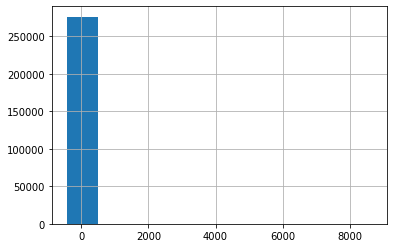

In [15]:
#Conforme o dicionario de dados: Casos novos registrados na data
dados.casos_novos.hist()

<AxesSubplot:>

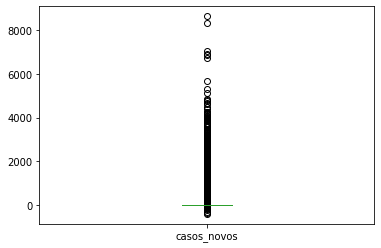

In [16]:
dados.casos_novos.plot(kind='box')

In [17]:
#Conforme o box plot e o describe temos valores negativos e valores bem grandes. Vamos verificar os dados negativos inicialmente
dados.casos_novos.describe()

count    276488.000000
mean         10.330376
std          90.703262
min        -419.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        8646.000000
Name: casos_novos, dtype: float64

In [18]:
dados.query("casos_novos < 0")

nome_munic  codigo_ibge  dia  mes   datahora  casos  casos_novos  \
276063        NaN          NaN   28    2 2020-02-28     -1           -1   
276071        NaN          NaN    7    3 2020-03-07      0           -4   
276078        NaN          NaN   14    3 2020-03-14      0          -10   
276080        NaN          NaN   16    3 2020-03-16      0          -71   
276083        NaN          NaN   19    3 2020-03-19      5           -3   
...           ...          ...  ...  ...        ...    ...          ...   
276479        NaN          NaN   19    4 2021-04-19    571          -33   
276482        NaN          NaN   22    4 2021-04-22    579          -21   
276483        NaN          NaN   23    4 2021-04-23    561          -18   
276485        NaN          NaN   25    4 2021-04-25    669          -80   
276486        NaN          NaN   26    4 2021-04-26    565         -104   

            casos_pc    casos_mm7d  obitos  ...  nome_drs cod_drs pop pop_60  \
276063  0,000000e+00     0,0000000       0  ...                 0   0      0   
276071  0,000000e+00     0,0000000       0  ...                 0   0      0   
276078  0,000000e+00     0,0000000       0  ...                 0   0      0   
276080  0,000000e+00     0,0000000       0  ...                 0   0      0   
276083  0,000000e+00     0,7142857       0  ...                 0   0      0   
...              ...           ...     ...  ...       ...     ...  ..    ...   
276479  0,000000e+00    10,5714286       2  ...                 0   0      0   
276482  0,000000e+00     8,7142857       1  ...                 0   0      0   
276483  0,000000e+00     2,1428571       0  ...                 0   0      0   
276485  0,000000e+00     9,2857143       0  ...                 0   0      0   
276486  0,000000e+00    -0,8571429       0  ...                 0   0      0   

       area  map_leg map_leg_s  latitude  longitude  semana_epidem  
276063    0                NaN    0,0000     0,0000              9  
276071    0                NaN    0,0000     0,0000             10  
276078    0                NaN    0,0000     0,0000             11  
276080    0                NaN    0,0000     0,0000             12  
276083    0                NaN    0,0000     0,0000             12  
...     ...      ...       ...       ...        ...            ...  
276479    0                NaN    0,0000     0,0000             16  
276482    0                NaN    0,0000     0,0000             16  
276483    0                NaN    0,0000     0,0000             16  
276485    0                NaN    0,0000     0,0000             17  
276486    0                NaN    0,0000     0,0000             17  

[199 rows x 26 columns]

<AxesSubplot:>

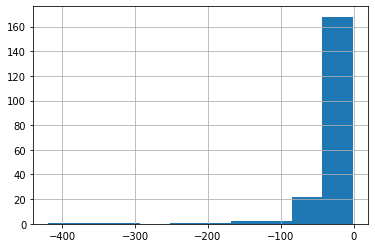

In [19]:
dados.query("casos_novos < 0").casos_novos.hist()

In [20]:
#Os casos negativos estão relacionados aos municipios nao identificados
dados.query("casos_novos < 0").nome_munic.value_counts(dropna=False)

NaN    199
Name: nome_munic, dtype: int64

In [21]:
#Vamos verificar o volume de casos que estariamos perdendo se removêssemos dos municipios faltantes
prop_na_munip = dados.assign(munip_nan = lambda x: np.where(pd.isna(x["nome_munic"]),"NA","Nao_NA")).groupby("munip_nan").casos.sum()
prop_na_munip/prop_na_munip.sum()*100

munip_nan
NA         0.025982
Nao_NA    99.974018
Name: casos, dtype: float64

In [22]:
#Como a quantidade de casos novos removidos é muito pequeno e precisaremos da informação da cidade para conseguirmos fazer os joins com as demais
# tabelas, vamos remover esses casos
dados = dados.query("nome_munic == nome_munic").reset_index(drop=True)

In [23]:
dados.casos_novos.describe()

count    276060.000000
mean         10.344320
std          90.749568
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        8646.000000
Name: casos_novos, dtype: float64

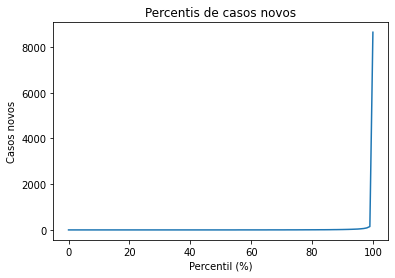

In [24]:
#Vamos agora verificar os casos novos muito grandes
range_percentil = range(101)
plt.plot(range_percentil,np.array([dados.casos_novos.quantile(i/100) for i in range_percentil]))
plt.title("Percentis de casos novos")
plt.xlabel("Percentil (%)")
plt.ylabel("Casos novos")
plt.show()

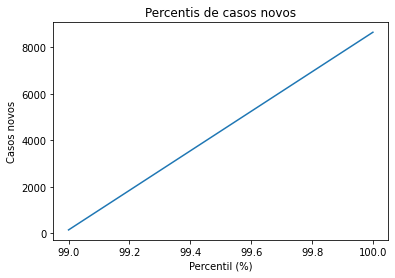

In [25]:
#Notamos que há um salto no percentil. Vamos dar um zoom no grafico acima para os percentis acima de 80%
range_percentil = range(99,101)
plt.plot(range_percentil,np.array([dados.casos_novos.quantile(i/100) for i in range_percentil]))
plt.title("Percentis de casos novos")
plt.xlabel("Percentil (%)")
plt.ylabel("Casos novos")
plt.show()

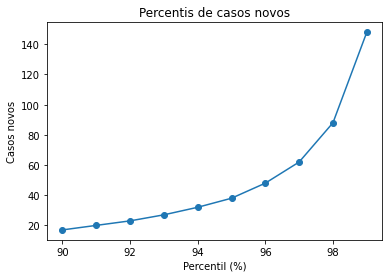

In [26]:
# O problema encontra-se realmente no valor máximo. Vamos ver se removermos o valor maximo
range_percentil = range(90,100)
plt.plot(range_percentil,np.array([dados.casos_novos.quantile(i/100) for i in range_percentil]),marker="o")
plt.title("Percentis de casos novos")
plt.xlabel("Percentil (%)")
plt.ylabel("Casos novos")
plt.show()

In [27]:
#Vamos verificar o caso acima de todos
dados[dados.casos_novos == dados.casos_novos.max()]

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
240937  São Paulo    3550308.0    1    4 2021-04-01  628043         8646   

            casos_pc    casos_mm7d  obitos  ...          nome_drs cod_drs  \
240937  5,291163e+03  4706,2857143   22425  ...  Grande São Paulo      10   

             pop   pop_60    area  map_leg map_leg_s  latitude  longitude  \
240937  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   

        semana_epidem  
240937             13  

[1 rows x 26 columns]

<AxesSubplot:xlabel='datahora'>

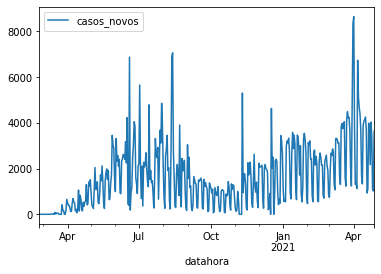

In [28]:
dados[(dados.nome_munic == "São Paulo")].plot(kind="line",x ="datahora",y = "casos_novos")

Como não temos evidencia para dizer que esse volume atipico seria algo errôneo, vamos considerar esse dados sem fazer nenhuma alteração

## casos

In [29]:
# De acordo com o dicionario de dados, casos é o acumulado desde o inicio da tabela. Vamos verificar se bate o valor somado de casos_novos com casos
casos_acumulados = dados.groupby("codigo_ibge").casos_novos.transform(lambda x: np.cumsum(x))

In [30]:
pd.DataFrame({"CasosAcc_Original": dados.casos, 
              "CasosAcc_Calculado": casos_acumulados}).assign(teste = lambda x: x["CasosAcc_Original"] == x["CasosAcc_Calculado"]).teste.value_counts()

True     275632
False       428
Name: teste, dtype: int64

In [31]:
#Existem casos que não batem
teste_sanidade = pd.DataFrame({"CasosAcc_Original": dados.casos, 
                               "CasosAcc_Calculado": casos_acumulados,
                               "data": dados.datahora,
                               "nome_munic": dados.nome_munic}).assign(teste = lambda x: x["CasosAcc_Original"] == 
                                                                                                 x["CasosAcc_Calculado"])

dados[~teste_sanidade.teste].nome_munic.value_counts()

São Paulo    428
Name: nome_munic, dtype: int64

In [32]:
# Ao que tudo indica, a diferença é de 1 caso, pois o inicio comecou com 1 caso já
teste_sanidade = teste_sanidade.query("nome_munic == 'São Paulo'")
teste_sanidade.assign(dif = lambda x:x["CasosAcc_Original"] - x["CasosAcc_Calculado"])

CasosAcc_Original  CasosAcc_Calculado       data nome_munic  teste  \
240536                  1                   0 2020-02-25  São Paulo  False   
240537                  1                   0 2020-02-26  São Paulo  False   
240538                  1                   0 2020-02-27  São Paulo  False   
240539                  2                   1 2020-02-28  São Paulo  False   
240540                  2                   1 2020-02-29  São Paulo  False   
...                   ...                 ...        ...        ...    ...   
240959             699461              699460 2021-04-23  São Paulo  False   
240960             702874              702873 2021-04-24  São Paulo  False   
240961             703977              703976 2021-04-25  São Paulo  False   
240962             704998              704997 2021-04-26  São Paulo  False   
240963             708635              708634 2021-04-27  São Paulo  False   

        dif  
240536    1  
240537    1  
240538    1  
240539    1  
240540    1  
...     ...  
240959    1  
240960    1  
240961    1  
240962    1  
240963    1  

[428 rows x 6 columns]

In [33]:
teste_sanidade.assign(dif = lambda x:x["CasosAcc_Original"] - x["CasosAcc_Calculado"]).dif.value_counts()

1    428
Name: dif, dtype: int64

In [34]:
# Como a diferença é apenas esta, para corrigir, vamos considerar 'casos_acumulados' como o valor correto para corrigir a cidade de São Paulo
dados.casos = casos_acumulados

## casos_pc

In [35]:
#casos_pc está como string. Precisamos converter
dados.casos_pc

0         0,000000e+00
1         0,000000e+00
2         0,000000e+00
3         0,000000e+00
4         0,000000e+00
              ...     
276055    4,729669e+03
276056    4,774799e+03
276057    4,774799e+03
276058    4,774799e+03
276059    4,801877e+03
Name: casos_pc, Length: 276060, dtype: object

In [36]:
#Todas as conversões foram possíveis
dados.casos_pc.str.replace(",",".").astype(float).isna().sum()

0

In [37]:
#O resultado é este
dados.casos_pc.str.replace(",",".").astype(float)

0            0.000
1            0.000
2            0.000
3            0.000
4            0.000
            ...   
276055    4729.669
276056    4774.799
276057    4774.799
276058    4774.799
276059    4801.877
Name: casos_pc, Length: 276060, dtype: float64

In [38]:
#Vamos apenas fazer um teste de sanidade. A divisão de casos por casos_pc deveria dar 100.000, conforme o dicionario de dados, mas na realidade, 
# dá um número constante de 0,11079
(dados.casos/dados.casos_pc.str.replace(",",".").astype(float)).tail(20)

276040    0.11079
276041    0.11079
276042    0.11079
276043    0.11079
276044    0.11079
276045    0.11079
276046    0.11079
276047    0.11079
276048    0.11079
276049    0.11079
276050    0.11079
276051    0.11079
276052    0.11079
276053    0.11079
276054    0.11079
276055    0.11079
276056    0.11079
276057    0.11079
276058    0.11079
276059    0.11079
dtype: float64

In [39]:
#O correto é pegar os dados de casos e dividir por 100.000
dados.casos_pc = dados.casos/100000

## casos_mm7d

In [40]:
#Conforme o dicionario de dados, casos_mm7d é a média móvel dos últimos 7 dias dos novos casos. Vamos verificar. Primeiramente, precisamos fazer a conversão de 
#string para float
dados.casos_mm7d

0            0,0000000
1            0,0000000
2            0,0000000
3            0,0000000
4            0,0000000
              ...     
276055       2,1428571
276056       2,8571429
276057       2,5714286
276058       2,5714286
276059       1,8571429
Name: casos_mm7d, Length: 276060, dtype: object

In [41]:
#A conversão foi bem sucedida
dados.casos_mm7d.str.replace(",",".").astype(float).isna().sum()

0

In [42]:
dados.casos_mm7d.str.replace(",",".").astype(float).tail(20)

276040    2.428571
276041    3.571429
276042    3.714286
276043    3.571429
276044    3.571429
276045    2.857143
276046    2.000000
276047    2.285714
276048    2.714286
276049    2.571429
276050    2.857143
276051    2.857143
276052    3.714286
276053    4.285714
276054    3.714286
276055    2.142857
276056    2.857143
276057    2.571429
276058    2.571429
276059    1.857143
Name: casos_mm7d, dtype: float64

In [43]:
#Vamos verificar se os dados estão batendo
dados.groupby("nome_munic").casos_novos.transform(lambda x: x.rolling(7).mean()).tail(20)

276040    2.428571
276041    3.571429
276042    3.714286
276043    3.571429
276044    3.571429
276045    2.857143
276046    2.000000
276047    2.285714
276048    2.714286
276049    2.571429
276050    2.857143
276051    2.857143
276052    3.714286
276053    4.285714
276054    3.714286
276055    2.142857
276056    2.857143
276057    2.571429
276058    2.571429
276059    1.857143
Name: casos_novos, dtype: float64

In [44]:
dados.casos_mm7d = dados.casos_mm7d.str.replace(",",".").astype(float)

## obitos_novos

<AxesSubplot:>

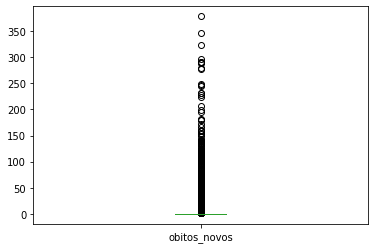

In [45]:
dados.obitos_novos.plot(kind = 'box')

In [46]:
dados.obitos_novos.describe()

count    276060.000000
mean          0.339933
std           3.747554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         378.000000
Name: obitos_novos, dtype: float64

In [47]:
#Os valores máximos de obito vem da cidade de São Paulo
dados[dados.obitos_novos == 378]

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
240942  São Paulo    3550308.0    6    4 2021-04-06  642321         6740   

        casos_pc   casos_mm7d  obitos  ...          nome_drs cod_drs  \
240942   6.42321  4467.571429   23222  ...  Grande São Paulo      10   

             pop   pop_60    area  map_leg map_leg_s  latitude  longitude  \
240942  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   

        semana_epidem  
240942             14  

[1 rows x 26 columns]

## obitos

In [48]:
#Obitos são os casos acumulados. Vamos fazer o mesmo teste de sanidade
casos_acumulados = dados.groupby("codigo_ibge").obitos_novos.transform(lambda x: np.cumsum(x))

In [49]:
#Para o caso de obitos, temos todos os casos corretos
pd.DataFrame({"CasosAcc_Original": dados.obitos, 
              "CasosAcc_Calculado": casos_acumulados}).assign(teste = lambda x: x["CasosAcc_Original"] == x["CasosAcc_Calculado"]).teste.value_counts()

True    276060
Name: teste, dtype: int64

## obitos_pc

In [53]:
#Teste se todos os dados podem ser convertidos
dados.obitos_pc.str.replace(",",".").astype(float).isna().sum()

0

In [55]:
#Vamos apenas fazer um teste de sanidade. A divisão de casos por casos_pc deveria dar 100.000, conforme o dicionario de dados, mas na realidade, 
# dá um número constante de 0,11079
(dados.obitos/dados.obitos_pc.str.replace(",",".").astype(float)).tail(20)

276040    0.11079
276041    0.11079
276042    0.11079
276043    0.11079
276044    0.11079
276045    0.11079
276046    0.11079
276047    0.11079
276048    0.11079
276049    0.11079
276050    0.11079
276051    0.11079
276052    0.11079
276053    0.11079
276054    0.11079
276055    0.11079
276056    0.11079
276057    0.11079
276058    0.11079
276059    0.11079
dtype: float64

In [56]:
#O correto é pegar os dados de casos e dividir por 100.000
dados.obitos_pc = dados.obitos/100000

## obitos_mm7d

In [57]:
#Conforme o dicionario de dados, obitos_mm7d é a média móvel dos últimos 7 dias dos novos obitos. Vamos verificar. Primeiramente, precisamos fazer a conversão de 
#string para float
dados.obitos_mm7d

0           0,0000000
1           0,0000000
2           0,0000000
3           0,0000000
4           0,0000000
             ...     
276055      0,1428571
276056      0,2857143
276057      0,1428571
276058      0,1428571
276059      0,2857143
Name: obitos_mm7d, Length: 276060, dtype: object

In [58]:
#A conversão foi bem sucedida
dados.obitos_mm7d.str.replace(",",".").astype(float).isna().sum()

0

In [59]:
dados.obitos_mm7d.str.replace(",",".").astype(float).tail(20)

276040    0.285714
276041    0.285714
276042    0.285714
276043    0.285714
276044    0.285714
276045    0.142857
276046    0.142857
276047    0.142857
276048    0.285714
276049    0.285714
276050    0.285714
276051    0.285714
276052    0.285714
276053    0.285714
276054    0.285714
276055    0.142857
276056    0.285714
276057    0.142857
276058    0.142857
276059    0.285714
Name: obitos_mm7d, dtype: float64

In [60]:
#Vamos verificar se os dados estão batendo
dados.groupby("nome_munic").obitos_novos.transform(lambda x: x.rolling(7).mean()).tail(20)

276040    0.285714
276041    0.285714
276042    0.285714
276043    0.285714
276044    0.285714
276045    0.142857
276046    0.142857
276047    0.142857
276048    0.285714
276049    0.285714
276050    0.285714
276051    0.285714
276052    0.285714
276053    0.285714
276054    0.285714
276055    0.142857
276056    0.285714
276057    0.142857
276058    0.142857
276059    0.285714
Name: obitos_novos, dtype: float64

In [61]:
dados.obitos_mm7d = dados.obitos_mm7d.str.replace(",",".").astype(float)

## letalidade

In [62]:
#de acordo com o dicionario de dados, a letalidade é calculada pela razão entre a quantidade de casos e de obitos (na realidade, obito/casos)
dados.obitos/dados.casos

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
276055    0.036260
276056    0.037807
276057    0.037807
276058    0.037807
276059    0.039474
Length: 276060, dtype: float64

In [63]:
#letalidade vem com virgula como separador decimal. Vamos converter
dados.letalidade = dados.letalidade.str.replace(",",".").astype(float)

In [64]:
#Verificando se a conversão trouxe valores faltantes
dados.letalidade.isna().sum()

0

In [65]:
#Comparando os resultados da letalidade já definida com os valores  calculados
pd.DataFrame({"LetalidadeCalculada": dados.obitos/dados.casos, 
              "LetalidadeOriginal":dados.letalidade,
              "nome_munic": dados.nome_munic,
              "data": dados.datahora}).fillna(0).assign(teste = lambda x: np.where((x["LetalidadeCalculada"] == 0 ) & 
                                                                                   (x["LetalidadeOriginal"] == 0),
                                                                                  1,
                                                                                  round(x["LetalidadeOriginal"]/x["LetalidadeCalculada"],
                                                                                        0))).teste.value_counts(dropna=False)

1.0    276059
0.0         1
Name: teste, dtype: int64

In [66]:
#Temos um caso em que há uma diferença grande na letalidade. Vamos verificar
teste_sanidade = pd.DataFrame({"LetalidadeCalculada": dados.obitos/dados.casos, 
                              "LetalidadeOriginal":dados.letalidade,
                              "nome_munic": dados.nome_munic,
                              "data": dados.datahora,
                              "obito":dados.obitos,
                              "casos":dados.casos}).fillna(0).assign(teste = lambda x: np.where((x["LetalidadeCalculada"] == 0 ) & 
                                                                                                   (x["LetalidadeOriginal"] == 0),
                                                                                                  1,
                                                                                                  round(x["LetalidadeOriginal"]/x["LetalidadeCalculada"],
                                                                                                        0)))

In [67]:
#Trata-se apenas uma questão de conversão, então o valor está correto
teste_sanidade.query('teste == 0')

LetalidadeCalculada  LetalidadeOriginal              nome_munic  \
270953                  inf                 0.0  Vargem Grande Paulista   

             data  obito  casos  teste  
270953 2020-03-25      1      0    0.0

## nome_ra

In [68]:
dados.nome_ra.value_counts(dropna=False).sort_values()

RA de Santos                    3852
RA de Registro                  5992
RA de Barretos                  8132
RA de Franca                    9844
RA de Ribeirão Preto           10700
RA Central                     11128
RA de Itapeva                  13696
RA de Bauru                    16692
RA de São José dos Campos      16692
RM de São Paulo                16692
RA de Araçatuba                18404
RA de Sorocaba                 20116
RA de Marília                  21828
RA de Presidente Prudente      22684
RA de Campinas                 38520
RA de São José do Rio Preto    41088
Name: nome_ra, dtype: int64

In [69]:
#Vamos remover esses valores 'RA de'
dados.nome_ra = pd.Categorical(dados.nome_ra.str.replace("RA de ","").str.replace("RA ","").str.replace("RM de ",""),
                               categories = dados.nome_ra.str.replace("RA de ","").str.replace("RA ","").str.replace("RM de ","").unique())

In [70]:
dados.nome_ra.value_counts().sort_values()

Santos                    3852
Registro                  5992
Barretos                  8132
Franca                    9844
Ribeirão Preto           10700
Central                  11128
Itapeva                  13696
Bauru                    16692
São José dos Campos      16692
São Paulo                16692
Araçatuba                18404
Sorocaba                 20116
Marília                  21828
Presidente Prudente      22684
Campinas                 38520
São José do Rio Preto    41088
Name: nome_ra, dtype: int64

## cod_ra

In [71]:
dados.cod_ra.value_counts()

14    41088
4     38520
9     22684
8     21828
13    20116
1     18404
3     16692
10    16692
15    16692
7     13696
5     11128
11    10700
6      9844
2      8132
16     5992
12     3852
Name: cod_ra, dtype: int64

In [72]:
dados.cod_ra = pd.Categorical(dados.cod_ra,categories=dados.cod_ra.unique())

## nome_drs

In [73]:
dados.nome_drs.value_counts(dropna=False)

São José do Rio Preto    43656
Bauru                    29104
Marília                  26536
Sorocaba                 20544
Presidente Prudente      19260
Campinas                 17976
Araçatuba                17120
Grande São Paulo         16692
Taubaté                  16692
Ribeirão Preto           11128
Piracicaba               11128
Araraquara               10272
Franca                    9416
São João da Boa Vista     8560
Barretos                  7704
Registro                  6420
Baixada Santista          3852
Name: nome_drs, dtype: int64

In [74]:
dados.nome_drs = pd.Categorical(dados.nome_drs,categories=dados.nome_drs.unique())

## cod_drs

In [75]:
dados.cod_drs.value_counts(dropna=False)

15    43656
12    29104
5     26536
6     20544
2     19260
3     17976
7     17120
17    16692
10    16692
11    11128
1     11128
8     10272
4      9416
14     8560
16     7704
9      6420
13     3852
Name: cod_drs, dtype: int64

In [76]:
dados.cod_drs = pd.Categorical(dados.cod_drs,categories=dados.cod_drs.unique())

## pop

<AxesSubplot:>

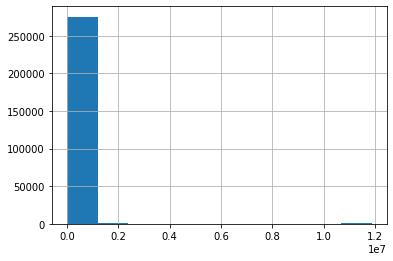

In [77]:
dados["pop"].hist()

<AxesSubplot:>

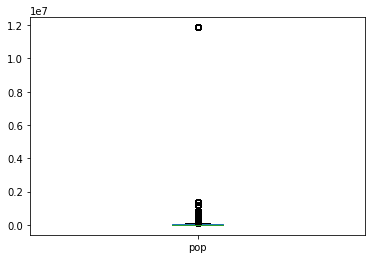

In [78]:
dados["pop"].plot(kind='box')

In [79]:
#Não temos valores negativos, apenas uma quantidade máxima bem diferente dos demais. Provavel que seja correspondente da cidade de São Paulo
dados["pop"].describe()

count    2.760600e+05
mean     6.920915e+04
std      4.798156e+05
min      8.120000e+02
25%      5.534000e+03
50%      1.331900e+04
75%      4.107300e+04
max      1.186966e+07
Name: pop, dtype: float64

In [80]:
dados.groupby("nome_munic")["pop"].mean().sort_values()

nome_munic
Borá                           812
Nova Castilho                 1176
Uru                           1207
Santa Salete                  1440
Santana da Ponte Pensa        1509
                            ...   
São José dos Campos         710654
São Bernardo do Campo       812086
Campinas                   1175501
Guarulhos                  1351275
São Paulo                 11869660
Name: pop, Length: 645, dtype: int64

## pop_60

In [81]:
#População acima de 60 anos
dados.groupby("nome_munic")["pop_60"].mean().sort_values()

nome_munic
Borá                         130
Nova Castilho                215
Uru                          258
União Paulista               280
Trabiju                      281
                          ...   
São Bernardo do Campo     122274
Santo André               123293
Guarulhos                 162662
Campinas                  192796
São Paulo                1853286
Name: pop_60, Length: 645, dtype: int64

In [82]:
#Percentual de pessoas idosas na cidade
dados["perc_60"]=dados.pop_60/dados["pop"]

<AxesSubplot:>

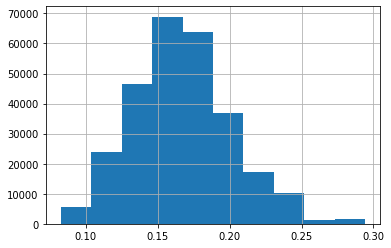

In [83]:
dados["perc_60"].hist()

## area

In [84]:
#area em km²
dados.groupby("nome_munic")["area"].mean().sort_values().head(20)

nome_munic
Francisco Morato          49
Piquete                  176
Aparecida d'Oeste        179
Águas de São Pedro       361
Salesópolis              425
Itaporanga               508
Taubaté                  625
Barueri                  657
Embu das Artes           704
Pindamonhangaba          730
Campo Limpo Paulista     794
Vinhedo                  816
Guarani d'Oeste          857
Fernão                  1005
Cerquilho               1278
Mombuca                 1337
Vargem                  1426
Araçariguama            1452
Uru                     1469
Turmalina               1478
Name: area, dtype: int64

In [85]:
dados.query("nome_munic == 'Francisco Morato'")[["area","pop"]].iloc[0]

area        49
pop     174403
Name: 79608, dtype: int64

<font color=red><b>Nota-se, porém, que algo não está certo!</font><br>
De acordo com o site do IBGE (https://cidades.ibge.gov.br/brasil/sp/aguas-de-sao-pedro/panorama), Águas de São Pedro, por exemplo, não tem 361km² de área, mas sim, 3,61km²<br>
O erro poderia ser apenas uma divisão por 100, porém, Francisco Morato (https://cidades.ibge.gov.br/brasil/sp/francisco-morato/panorama) está com a área correta e Fernão (https://cidades.ibge.gov.br/brasil/sp/fernao/panorama) necessita apenas de uma divisão por 10.<br>
<b>Dessa forma, temos erros diferentes que não conseguimos identificar facilmente sem ter uma análise caso a caso.</b><br>
Vamos recuperar os dados diretamente do IBGE (https://cidades.ibge.gov.br/brasil/sintese/sp?indicadores=29171,25207,29168,29167)    


In [86]:
#Dados baixodos diretamente do site do IBGE
pop_area_municipios = pd.read_excel("../data/raw/SEADE/munic_area_pop.xlsx")

In [87]:
#Nenhum problema ao se realizar o merge. Portanto, vamos considerar essa area
dados.drop(columns = "area").merge(pop_area_municipios[["Municípios","area"]],
                                    how = "left",
                                    right_on = "Municípios",
                                    left_on = "nome_munic").area.isna().sum()

0

In [88]:
dados = dados.drop(columns = "area").merge(pop_area_municipios[["Municípios","area"]],
                                            how = "left",
                                            right_on = "Municípios",
                                            left_on = "nome_munic")

In [89]:
#Agora os dados estão corretos
dados.groupby("nome_munic")["area"].mean().sort_values()

nome_munic
Águas de São Pedro       3.612
São Caetano do Sul      15.331
Poá                     17.264
Jandira                 17.449
Taboão da Serra         20.388
                        ...   
Capão Bonito          1640.230
Eldorado              1654.256
Itapetininga          1789.350
Itapeva               1826.258
Iguape                1978.795
Name: area, Length: 645, dtype: float64

In [90]:
#Definindo outra variavel, relacionada a densidade populacional
dados["densi_pop"] = dados["pop"]/dados["area"]

In [91]:
#Definindo outra variavel, relacionada a densidade populacional idosa
dados["densi_pop_60"] = dados["pop_60"]/dados["area"]

<AxesSubplot:>

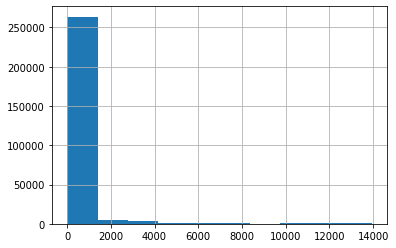

In [92]:
dados["densi_pop"].hist()

<AxesSubplot:>

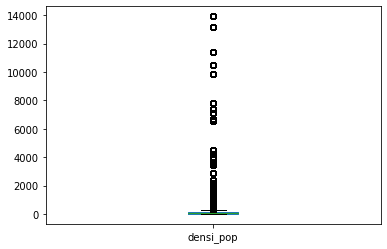

In [93]:
dados["densi_pop"].plot(kind="box")

<AxesSubplot:>

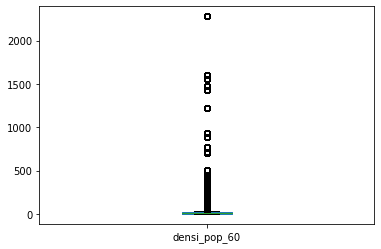

In [94]:
dados["densi_pop_60"].plot(kind="box")

In [95]:
dados[dados["densi_pop_60"] > 2000].nome_munic.value_counts()

São Caetano do Sul    428
Name: nome_munic, dtype: int64

## map_leg

In [96]:
# Apenas dados para legenda de mapas, assim como map_leg_s
dados["map_leg"].value_counts()

<50      57453
<150     45800
0        45195
<300     31612
<5000    30507
<600     27734
<1200    23557
>5000    14202
Name: map_leg, dtype: int64

## latitude

In [97]:
#Dados de latitude são do tipo object, por conta das vírgulas. Vamos trocar e vamos fazer a conversão
dados.latitude.dtype

dtype('O')

In [98]:
dados.latitude.str.replace(",",".").astype(float)

0        -21.6820
1        -21.6820
2        -21.6820
3        -21.6820
4        -21.6820
           ...   
276055   -22.2713
276056   -22.2713
276057   -22.2713
276058   -22.2713
276059   -22.2713
Name: latitude, Length: 276060, dtype: float64

In [99]:
dados.latitude = dados.latitude.str.replace(",",".").astype(float)

<AxesSubplot:>

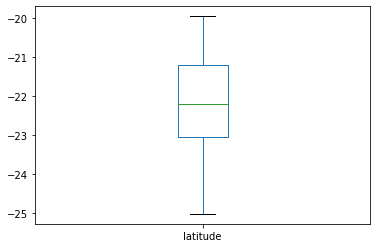

In [100]:
dados.latitude.plot(kind="box")

## longitude

In [101]:
#Procedendo da mesma forma para a longitude
dados.longitude.str.replace(",",".").astype(float)

0        -51.0737
1        -51.0737
2        -51.0737
3        -51.0737
4        -51.0737
           ...   
276055   -46.9481
276056   -46.9481
276057   -46.9481
276058   -46.9481
276059   -46.9481
Name: longitude, Length: 276060, dtype: float64

In [102]:
dados.longitude=dados.longitude.str.replace(",",".").astype(float)

<AxesSubplot:>

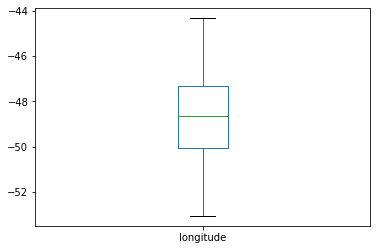

In [103]:
dados.longitude.plot(kind='box')

In [104]:
#Vamos plotar no mapa os pontos de interesse
mapa = folium.Map(prefer_canvas=True)
dados.groupby(["latitude","longitude"]).nome_munic.size().reset_index().apply(lambda x: folium.CircleMarker(location=[x["latitude"],x["longitude"]],
                                                                                                          radius=2,
                                                                                                          weight=5).add_to(mapa),axis=1)
mapa

In [105]:
write_table_from_pandas(dados,"../data/interim/dados_covid_sp.parquet")